In [13]:
#!pip install OSMPythonTools

In [14]:
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

nominatim = Nominatim()
overpass = Overpass()

In [15]:
categories = {
    'park':{'elementType':['way','relation'],'selector':'"leisure"="park"','color':'green'},
    'square':{'elementType':['way','relation'],'selector':'"place"="square"','color':'black'},
    'pedestrian':{'elementType':['way','relation'],'selector':'"highway"="pedestrian"','color':'black'},
    'forest':{'elementType':['way','relation'],'selector':'"landuse"="forest"','color':'green'},
    'bus-stop':{'elementType':'node','selector':'"highway"="bus_stop"','color':'red'},
    'subway-stop': {'elementType':'node','selector':'"railway"="subway_entrance"','color':'red'}
    }

In [21]:
def osm_frame(osm_query, type, color):
    id = []
    geometry = []
    osm_type = []
    tags = []

    for elemento in osm_query.elements():
        id.append(elemento.id())
        geometry.append(elemento.geometry())
        osm_type.append(elemento.type())
        tags.append(elemento.tags())
        
    d = {'id':id, 'geometry':geometry, 'type':osm_type, 'tags':tags, 'type':type, 'color':color}

    df = pd.DataFrame(data = d, index = d['id'])
    return df

In [22]:
def get_features(area : str, keywords:dict):
    return overpass.query(overpassQueryBuilder(
        area= area,
        elementType = keywords['elementType'],
        selector=keywords['selector'],
        out='body',
        includeGeometry=True))

In [28]:
areas = [
    'Alcalá de Henares','Alcobendas','Alcorcón','Boadilla del Monte','Brunete',
    'Colmenar Viejo', 'Coslada','Fuenlabrada','Getafe', 'Humanes de Madrid',
    'Leganés', 'Majadahonda', 'Mejorada del Campo', 'Móstoles', 'Paracuellos de Jarama',
    'Parla','Pinto', 'Pozuelo de Alarcón', 'Rivas-Vaciamadrid', 'Las Rozas de Madrid',
    'San Fernando de Henares', 'San Sebastián de los Reyes', 'Torrejón de Ardoz',
    'Velilla de San Antonio', 'Villanueva de la Cañada', 'Villanueva del Pardillo', 'Villaviciosa de Odón', 'Tres Cantos', 'Madrid']

In [29]:
data = {} 

In [30]:
for area in areas:
    area = nominatim.query(area, wkt=True)
    gdf = pd.concat(
        [gpd.GeoDataFrame(
            osm_frame(
                get_features(
                    area,
                    categories[cat]),
                cat,
                categories[cat]['color'])
            ) for cat in categories]
        )
    data[area] = gdf

[nominatim] downloading data: search
[overpass] downloading data: [timeout:25][out:json];area(3600345879)->.searchArea;(way["leisure"="park"](area.searchArea);relation["leisure"="park"](area.searchArea);); out body geom;
[api] downloading data: way/256362073/full
[api] downloading data: way/256362078/full
[api] downloading data: way/28049201/full
[api] downloading data: way/256372629/full
[api] downloading data: way/256372630/full
[api] downloading data: way/257013191/full
[api] downloading data: way/257013190/full
[api] downloading data: way/28343781/full
[api] downloading data: way/255070821/full
[api] downloading data: way/258582736/full
[api] downloading data: way/258984193/full
[api] downloading data: way/254404242/full
[api] downloading data: way/258984190/full
[api] downloading data: way/258984194/full
[api] downloading data: way/314112000/full
[api] downloading data: way/32900523/full
[api] downloading data: way/34908883/full
[api] downloading data: way/464098392/full
[api] dow

<AxesSubplot: >

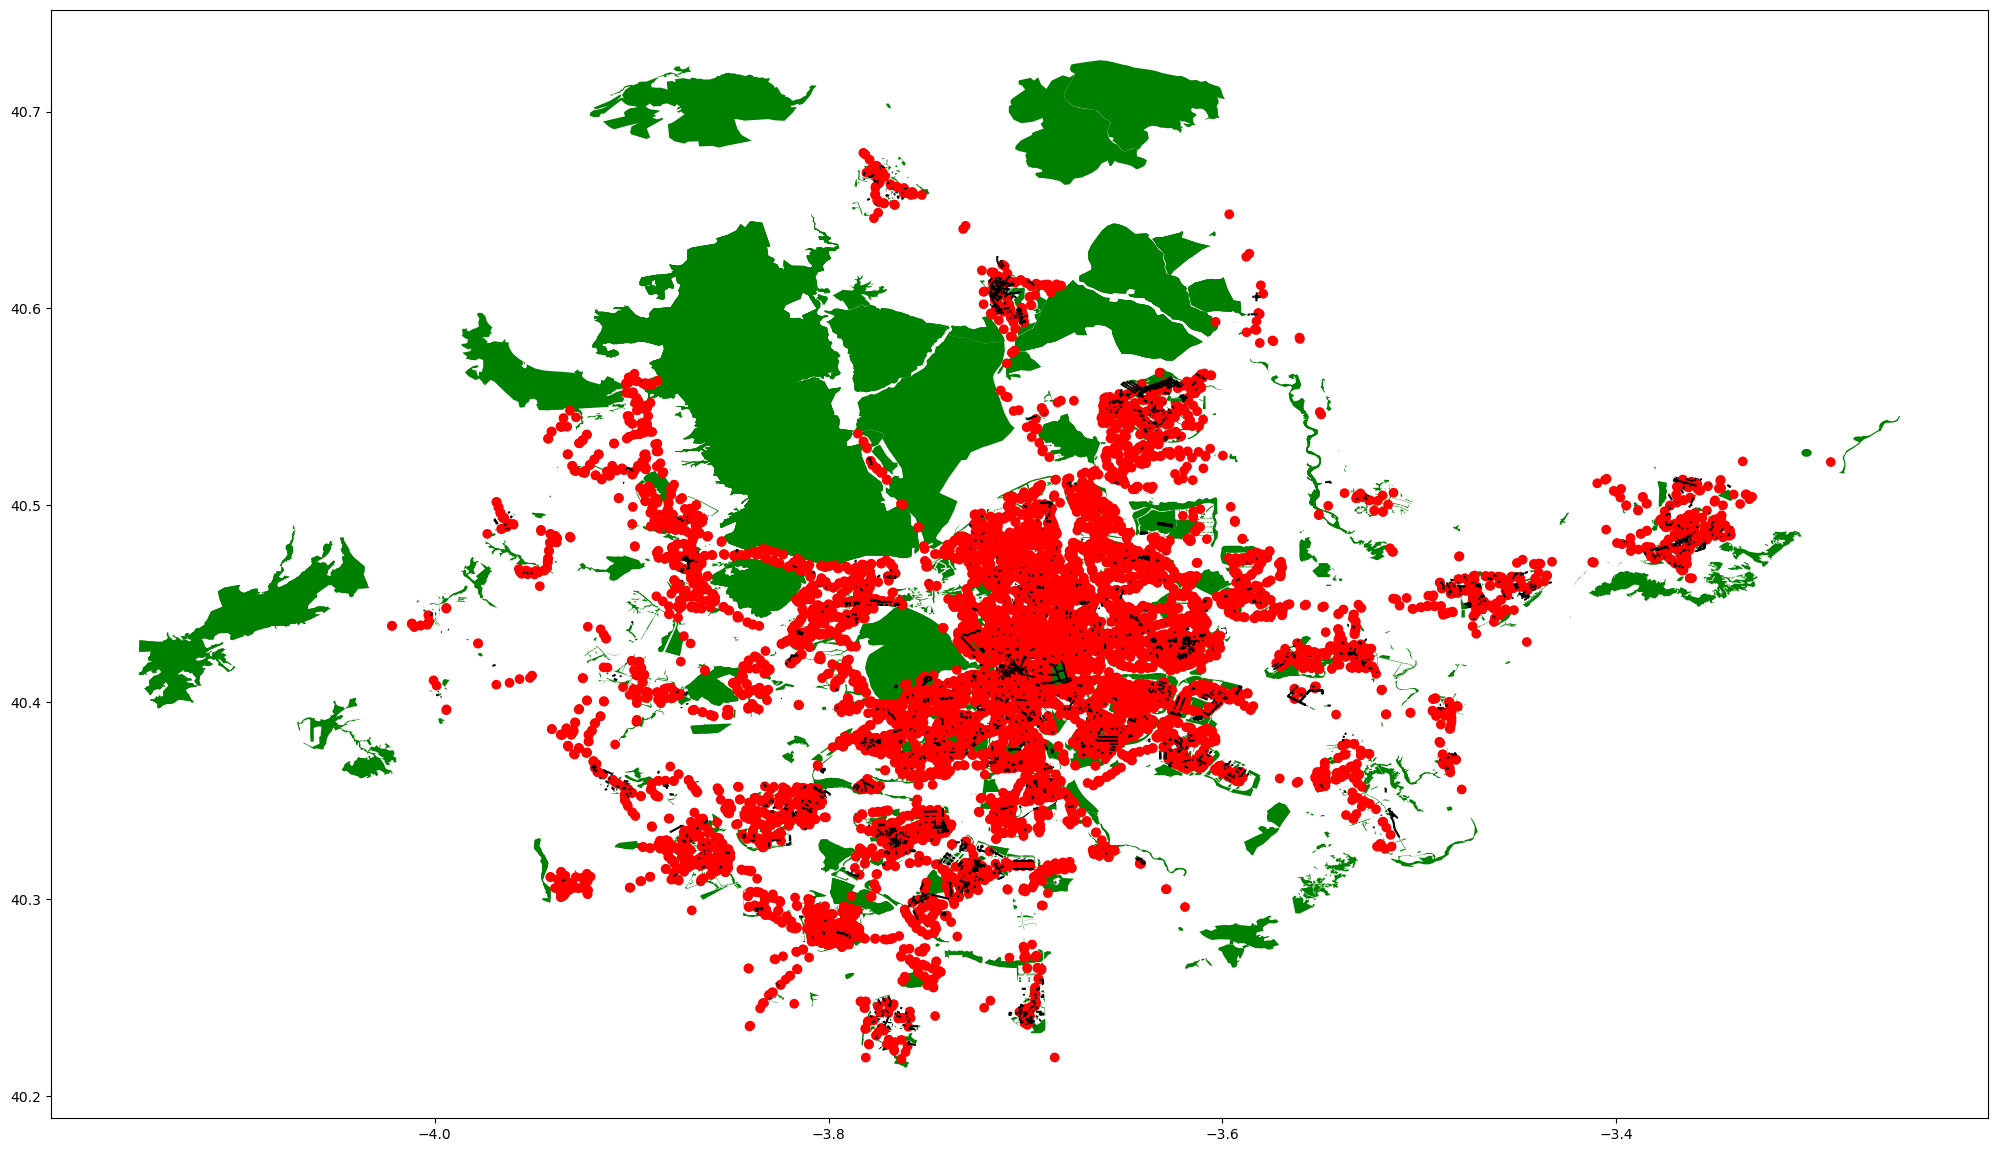

In [31]:
df = pd.concat(data.values())
fig, ax = plt.subplots (figsize = (25,25))
df.plot(ax = ax, color=df.color)

[overpass] downloading data: [timeout:25][out:json];area(3605326784)->.searchArea;(node["railway"="subway_entrance"](area.searchArea);); out body geom;


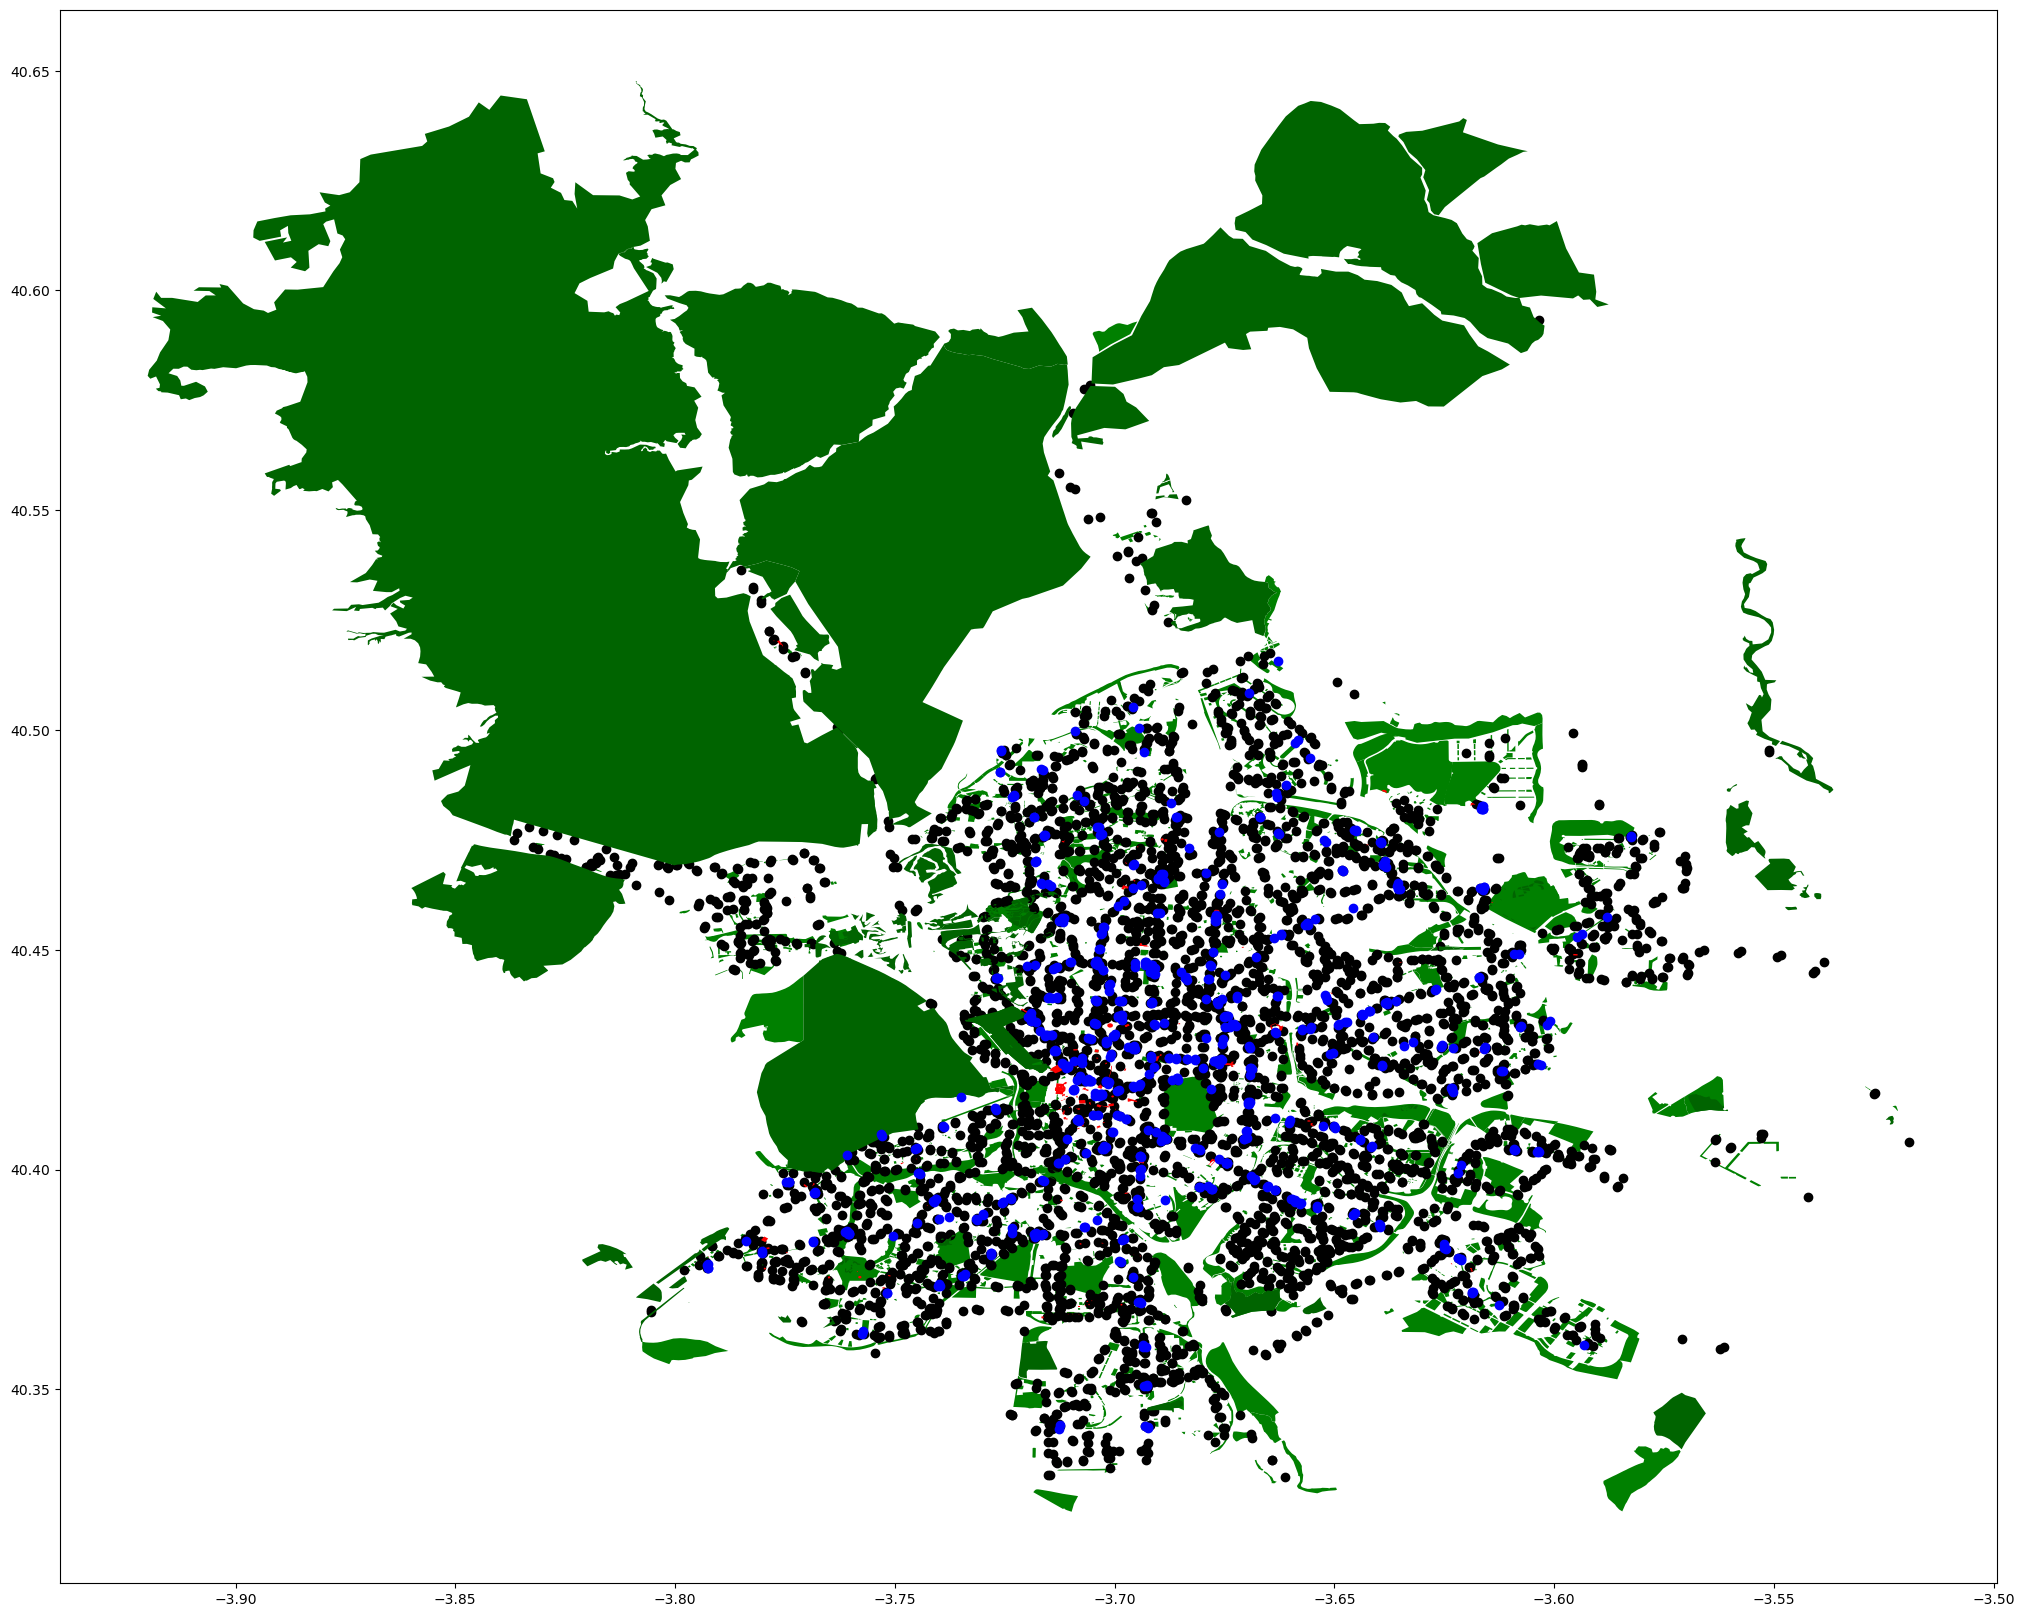

In [9]:


#Definicion area de consulta
area = nominatim.query('Madrid', wkt=True)

#Consulta a la API de OSM
park = overpassQueryBuilder(area= area, elementType= ['way','relation'], selector='"leisure"="park"', out='body', includeGeometry=True )
square = overpassQueryBuilder(area=area,elementType= ['way','relation'],selector='"place"="square"', out='body', includeGeometry=True)
forest = overpassQueryBuilder(area= area, elementType= ['way','relation'], selector='"landuse"="forest"', out='body', includeGeometry=True )
busStop = overpassQueryBuilder(area= area, elementType= 'node', selector='"highway"="bus_stop"', out='body', includeGeometry=True )
subwayStop = overpassQueryBuilder(area= area, elementType= 'node', selector='"railway"="subway_entrance"', out='body', includeGeometry=True )


park = overpass.query(park)
busStop = overpass.query(busStop)
forest = overpass.query(forest)
square = overpass.query(square)
metro_entrance = overpass.query(subwayStop)

#Creacion de pandas.dataframe a partir de query a API
def data_frame(osm_query):
    id = []
    geometry = []
    osm_type = []
    tags = []

    for elemento in osm_query.elements():
        id.append(elemento.id())
        geometry.append(elemento.geometry())
        osm_type.append(elemento.type())
        tags.append(elemento.tags())
        
    d = {'id':id, 'geometry':geometry, 'type':osm_type, 'tags':tags, }

    df = pd.DataFrame(data = d, index = d['id'])
    return df

df_park = data_frame(park)
df_bus = data_frame(busStop)
df_square = data_frame(square)
df_forest = data_frame(forest)
df_metro = data_frame(metro_entrance)


#Genera geodataframe
gdf_park = gpd.GeoDataFrame(df_park, geometry='geometry')
gdf_bus = gpd.GeoDataFrame(df_bus, geometry='geometry')
df_square = gpd.GeoDataFrame(df_square, geometry='geometry')
df_forest = gpd.GeoDataFrame(df_forest, geometry='geometry')
df_metro = gpd.GeoDataFrame(df_metro, geometry='geometry')

#Dibuja consulta
fig, ax = plt.subplots (figsize = (25,25))
gdf_park.plot(ax = ax, color='green')
gdf_bus.plot(ax = ax, color='black')
df_square.plot(ax = ax, color='red')
df_forest.plot(ax = ax, color='darkgreen')
df_metro.plot(ax = ax, color='blue')

plt.show()

In [ ]:
#FALTA CONVERTIR LAS COLUMNAS PROPIAS DE CADA DATASET A TAGS
#RECONOCER LAS FILAS POR TIPO DE GEOMETRIA Y EXPORTAR

In [ ]:
import requests
#url = "https://download.geofabrik.de/europe/spain/madrid-latest.osm.pbf"

In [ ]:
#response = requests.get(url, stream=True)

In [ ]:
#open(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\madrid-latest.osm.pbf", "wb").write(response.content)

In [ ]:
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
queries = {
    'transit':{'route': routes, 'railway': rails, 'bus': bus, 'public_transport': True},
    'park' : {'leisure': ['park'],'landuse':['forest']}, 
    
    }'square':{'place':['square'],'highway':['pedestrian']}

In [ ]:
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("madrid")

# Initialize the OSM parser object with test data from Helsinki
osm = OSM(fp)

osm_data = {key:osm.get_data_by_custom_criteria(custom_filter=query,
                                        filter_type="keep",
                                        keep_nodes=True, 
                                        keep_ways=True, 
                                        keep_relations=True) for key,query in queries.items()}

In [ ]:
cols = ['id','timestamp','lon','lat','category','name','tags','osm_type','geometry']
for key, data in osm_data.items():
    print(key)
    data['category'] = key
    if 'name' not in data.columns:
        import ast
        data['name'] = data['tags'].fillna('{"no":"no"}').apply(ast.literal_eval).str['name']
        
    osm_data[key] = data[cols]

In [ ]:
import pandas as pd
c = pd.concat(osm_data.values())

In [ ]:
geom = c[c['id']==4263036]['geometry'].iloc[0]

In [ ]:
from shapely.geometry import LineString, MultiLineString

In [ ]:
def isring(geom):
    if isinstance(geom,MultiLineString):
        if tuple(round(x,5) for x in geom.geoms[0].coords[0]) == tuple(round(x,5) for x in geom.geoms[-1].coords[-1]):
            return True
        else:
            return False
    elif isinstance(geom,LineString):
        if tuple(round(x,5) for x in geom.coords[0]) == tuple(round(x,5) for x in geom.coords[-1]):
            return True
        else:
            return False
    else:
        False
    

In [ ]:
closering(geom)

In [ ]:
c = c.loc[(c['category'].isin(['square','park']))&(c['geometry'].apply(lambda g: isring(g)))].assign(
    geometry = lambda row: row['geometry'].convex_hull)
                                                                       
                                                                       
#.isin(['LineString','MultiLineString']))].assign(
 #   geometry = lambda row: row['geometry'].convex_hull)


In [ ]:
#c[(c['name'].fillna("").str.contains('Plaza Mayor'))&(c['category']=='square')]
c[c['id']==4263036]['geometry']

In [ ]:
c.to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\test_osm.gpkg", driver = 'GPKG')

In [ ]:

c.to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\test_osm.gpkg", driver = 'GPKG')
#c[c['osm_type']=='node'].to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\points_osm.gpkg", driver = 'GPKG')
#c[c['osm_type']=='relation'].to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\polygons_osm.gpkg", driver = 'GPKG')
#c[c['osm_type']=='way'].to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\ways_osm.gpkg", driver = 'GPKG')

In [ ]:
osm_data['transit'].dtypes

In [ ]:
osm_data['park'].columns

In [ ]:
import ast
osm_data['square']['tags'].fillna('{"no":"no"}').apply(ast.literal_eval).str['name']

In [ ]:
osm_data['park'].fillna("").query('name.str.contains("Retiro")', engine='python')
#df.query('column_name.str.contains("abc")', engine='python')


In [ ]:
#file = r"C:\Users\ManuBenito\Documents\Walknet-DataLake\temp\madrid-latest.osm.pbf"

In [ ]:
# Read natural
# ============
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("madrid")
# Initialize the OSM parser object
osm = OSM(fp)
#natural = osm.get_natural()
#natural.plot(column='natural', legend=True, figsize=(10,6))

In [ ]:
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("madrid")

# Initialize the OSM parser object with test data from Helsinki
osm = OSM(fp)

# Test reading all transit related data (bus, trains, trams, metro etc.)
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)

In [ ]:
from pyrosm import OSM
from pyrosm import get_data
fp = get_data("madrid")

# Initialize the OSM parser object with test data from Helsinki
osm = OSM(fp)

In [ ]:
parks = osm.get_data_by_custom_criteria(custom_filter={
                                        'leisure': ['park'],
                                        'place':['square']},
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=True, 
                                        keep_ways=True, 
                                        keep_relations=True)

In [ ]:
parks.plot(column='name')

In [ ]:
parks.columns

In [ ]:
for p in parks['name'].unique():
    print(p)